In [1]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [3]:
#  使用panda读取csv文件
f1 = pd.read_csv('70500X16.csv', header=None)
#f2 = pd.read_csv('tag_data_output.csv', header=None)
f3 = pd.read_csv('validate.csv', header=None)
data = pd.concat([f1])
data = data.to_numpy()[:, 2:]
validate_data = f3.to_numpy()[:, 2:]


In [4]:
#  对numpy数据进行归一化
from sklearn.preprocessing import StandardScaler
    
scaler = StandardScaler()
data = scaler.fit_transform(data.astype(np.float32))
validate_data = scaler.fit_transform(validate_data.astype(np.float32))


In [101]:
record_default = [[0.0]] * 16
ds = tf.data.experimental.CsvDataset(['x16.csv'], record_default, header=True)
ds = ds.map(lambda *items: tf.stack(items[:]))
dataset  = tf.data.Dataset.zip((ds, ds)).batch(1).repeat()
ts = tf.data.experimental.CsvDataset('validate16.csv', record_default, header=True)
ts = ts.map(lambda *items: tf.stack(items[:]))
testset  = tf.data.Dataset.zip((ts, ts)).batch(1).repeat()

In [102]:
inputsize = 16
hiddensize = 16
outputsize = 16

In [103]:
x = tf.keras.layers.Input(shape=(inputsize, ))
h1 = tf.keras.layers.Dense(hiddensize/2, activation='relu')(x)
h2 = tf.keras.layers.Dense(hiddensize/4)(h1)
o1 = tf.keras.layers.Dense(hiddensize/2, activation='relu')(h2)
y = tf.keras.layers.Dense(outputsize)(o1)
                                 
model = tf.keras.Model(inputs=x, outputs=y)
model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.02), loss='mse',metrics=['accuracy'])

In [104]:
model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_28 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_30 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_31 (Dense)             (None, 16)                272       
Total params: 824
Trainable params: 824
Non-trainable params: 0
_________________________________________________________________


In [105]:
histroy = model.fit(dataset,
                    epochs=100,
                    #batch_size=336,
                    steps_per_epoch=70500,
                    validation_data=testset,
                    validation_steps= 500,
                    shuffle=True
                    
)

Train for 70500 steps, validate for 500 steps
Epoch 1/100
70500/70500 [==============================] - 81s 1ms/step - loss: 115.0123 - accuracy: 0.7599 - val_loss: 90.2797 - val_accuracy: 0.0080
Epoch 2/100
70500/70500 [==============================] - 77s 1ms/step - loss: 11.8543 - accuracy: 0.8642 - val_loss: 84.1251 - val_accuracy: 0.0580
Epoch 3/100
70500/70500 [==============================] - 77s 1ms/step - loss: 8.2911 - accuracy: 0.8940 - val_loss: 78.1768 - val_accuracy: 0.1960
Epoch 4/100
70500/70500 [==============================] - 77s 1ms/step - loss: 6.1410 - accuracy: 0.9201 - val_loss: 73.7413 - val_accuracy: 0.3400
Epoch 5/100
70500/70500 [==============================] - 78s 1ms/step - loss: 4.7577 - accuracy: 0.9397 - val_loss: 70.3745 - val_accuracy: 0.3720
Epoch 6/100
70500/70500 [==============================] - 79s 1ms/step - loss: 3.9238 - accuracy: 0.9479 - val_loss: 66.9610 - val_accuracy: 0.3720
Epoch 7/100
70500/70500 [==============================] 

70500/70500 [==============================] - 76s 1ms/step - loss: 1.0440 - accuracy: 0.9655 - val_loss: 45.5746 - val_accuracy: 0.2860
Epoch 56/100
70500/70500 [==============================] - 77s 1ms/step - loss: 1.0370 - accuracy: 0.9655 - val_loss: 45.6643 - val_accuracy: 0.2800
Epoch 57/100
70500/70500 [==============================] - 76s 1ms/step - loss: 1.0312 - accuracy: 0.9655 - val_loss: 45.7446 - val_accuracy: 0.2840
Epoch 58/100
70500/70500 [==============================] - 75s 1ms/step - loss: 1.0308 - accuracy: 0.9655 - val_loss: 45.8032 - val_accuracy: 0.2900
Epoch 59/100
70500/70500 [==============================] - 75s 1ms/step - loss: 1.0386 - accuracy: 0.9655 - val_loss: 45.8116 - val_accuracy: 0.2980
Epoch 60/100
70500/70500 [==============================] - 75s 1ms/step - loss: 1.0468 - accuracy: 0.9654 - val_loss: 45.7756 - val_accuracy: 0.3020
Epoch 61/100
70500/70500 [==============================] - 76s 1ms/step - loss: 1.0495 - accuracy: 0.9654 - val_

In [106]:
encoder = tf.keras.Model(x, h2)
"""for item in dataset.take(1):
    #print(item)
    encoding = encoder.predict(item)
    print(encoding[0])
    #decoding = model.predict(item)
    #print(decoding[0])"""
for item in dataset.take(1):
    #print(item)
    encoding = encoder.predict(item)
    print(encoding[0])

[ 15.264053     3.857541    -0.59271455 -15.303977    -2.8487039
  52.236343    -3.423177   -47.675797  ]


In [24]:
encoder = tf.keras.Model(x, h2)
print(data[0])
encoding = encoder.predict(data)
print(encoding[0])
decoding = model.predict(data)
print(decoding[0])

[0.117 0.05  0.025 0.025 0.049 0.117 0.042 0.024 0.024 0.048 0.114 0.039
 0.024 0.024 0.049 0.113 0.036 0.102 0.114 0.092 0.029 0.03  0.03  0.09
 0.111 0.03  0.029 0.029 0.079 0.119 0.03  0.031 0.031 0.079 0.098 0.029
 0.028 0.024 1.597 3.453 1.288 0.102 0.789 0.195 0.129 1.133 0.211 0.152
 0.063 0.024 0.024 0.082 0.105 0.025 0.025 0.025 0.11  0.053 0.025 0.025
 0.041 0.146 0.109 0.826 0.029 0.05  0.12  0.029 0.029 0.029 0.077 0.097
 0.03  0.029 0.029 0.106 0.071 0.029 0.099 0.113 0.101 0.029 0.029 0.04
 0.828 2.762 0.085 0.024 0.074 0.111 0.442 0.353 0.322 0.21  0.184 0.135
 0.161 0.057 0.024 0.024 0.067 0.116 0.046 0.044 0.042 0.084 0.091 0.094
 0.112 0.099 0.73  0.175 0.042 0.474 0.2   0.062 0.054 0.069 0.133 0.052
 0.029 0.035 0.135 0.228 0.154 0.137 0.138 0.521 0.295 0.279 0.234 0.187
 0.184 0.316 0.231 0.208 0.104 0.103 0.058 0.023 0.023 0.044 0.114 0.393
 0.225 0.098 0.025 0.025 0.108 0.025 0.025 0.035 0.116 0.029 0.024 0.025
 0.104 0.05  0.024 0.419 0.45  0.082 0.029 0.029 0.06

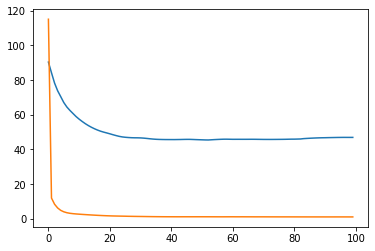

In [108]:
plt.plot(histroy.history['val_loss'])
plt.plot(histroy.history['loss'])
#plt.plot(histroy.history['accuracy'])

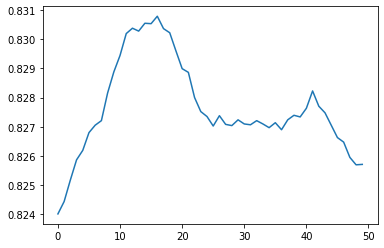

In [93]:
plt.plot(histroy.history['accuracy'])

In [18]:
x = model.evaluate(data[0])
print(x)

ValueError: Error when checking input: expected input_1 to have shape (336,) but got array with shape (1,)

In [11]:
#  保存模型
model.save('A2150_100_20200311.h5')

In [109]:
# 保存输出数据到csv文件中
import csv

with open("x8.csv", 'w', newline='') as f:
    f_csv = csv.writer(f)
    k = 0
    for item in dataset.take(70500):
        k += 1
        if(k % 1000 == 0):
            print(k)
        encoding = encoder.predict(item)
        f_csv.writerow(encoding[0])

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000


In [21]:
from cmath import *

In [50]:
a = 1.739 + 1.739j

In [51]:
a

(1.739+1.739j)

In [52]:
b = polar(a)
b

(2.4593173849668126, 0.7853981633974483)

In [53]:
b[1]*180 / pi


45.0

In [49]:
sqrt((1 + 1.02 * 1.6 * sin(b[1]))**2 + (1.02 * 1.6 * cos(b[1])) ** 2)

(1.7387641976153545+0j)

In [43]:
0.13 + 0.33 + 0.12 + 1.6

2.18

In [54]:
2.459 / 2.18

1.1279816513761467